<a href="https://colab.research.google.com/github/Max-Willians/Data_Visualization/blob/main/Desafio_grafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Definindo paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/refs/heads/master/dados/relatorio_vendas.csv'

In [4]:
dados = pd.read_csv(url)
dados.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   data_pedido          8940 non-null   object 
 1   data_envio           8940 non-null   object 
 2   modo_envio           8940 non-null   object 
 3   nome_cliente         8940 non-null   object 
 4   segmento_cliente     8940 non-null   object 
 5   cidade               8940 non-null   object 
 6   estado               8940 non-null   object 
 7   regiao               8940 non-null   object 
 8   departamento         8940 non-null   object 
 9   tipo_produto         8940 non-null   object 
 10  preco_base           8940 non-null   float64
 11  preco_unit_sem_desc  8940 non-null   float64
 12  desconto             8940 non-null   float64
 13  preco_unit_venda     8940 non-null   float64
 14  quantidade           8940 non-null   int64  
 15  vendas               8940 non-null   f

# Tratando dados de data

In [6]:
dados['data_pedido'] = pd.to_datetime(dados['data_pedido'], format='%Y-%m-%d')
dados['data_envio'] = pd.to_datetime(dados['data_envio'], format='%Y-%m-%d')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

In [7]:
dados.describe()

,data_pedido,data_envio,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
count,8940,8940,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000
mean,2018-05-02 07:59:11.677852416,2018-05-06 07:12:57.986577152,196.135833,227.340655,0.077247,209.876315,3.802685,792.058115,50.811915
min,2016-01-04 00:00:00,2016-01-08 00:00:00,2.060000,1.900000,0.000000,1.140000,1.000000,1.510000,-11219.950000
25%,2017-05-26 00:00:00,2017-05-29 00:00:00,15.950000,19.990000,0.000000,18.600000,2.000000,59.245000,3.000000
50%,2018-06-27 00:00:00,2018-07-01 00:00:00,50.450000,60.350000,0.075000,55.350000,3.000000,186.945000,14.800000
75%,2019-05-16 06:00:00,2019-05-20 00:00:00,208.220000,237.860000,0.100000,217.570000,5.000000,717.960000,50.340000
max,2019-12-31 00:00:00,2020-01-06 00:00:00,9043.980000,11899.970000,0.400000,11899.970000,14.000000,59499.850000,14280.000000
std,NaN,NaN,436.256753,522.072436,0.103054,486.213077,2.235391,2048.527267,415.435345


# Desafio 1: Quais são os lucros das vendas por ano? Em qual ano obtivemos o maior lucro?

In [8]:
dados.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [9]:
# Criando um df com os dados desejados
df_lucro_ano = dados.copy()
df_lucro_ano = df_lucro_ano[['data_pedido', 'lucro']]
df_lucro_ano.head()

,data_pedido,lucro
0,2018-11-09,71.26
1,2018-11-09,373.29
2,2018-06-13,11.68
3,2017-10-12,-651.15
4,2017-10-12,4.28


In [10]:
# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido e agrupando os dados por ano
df_lucro_ano['ano'] = df_lucro_ano.data_pedido.dt.year
df_lucro_ano.drop(labels= 'data_pedido', axis=1, inplace=True)

# Agrupando os dados por ano
df_lucro_ano = df_lucro_ano.groupby(['ano']).aggregate('sum')

df_lucro_ano

,lucro
ano,
2016,75033.63
2017,101265.15
2018,129862.44
2019,148097.30


# Gerando gráfico

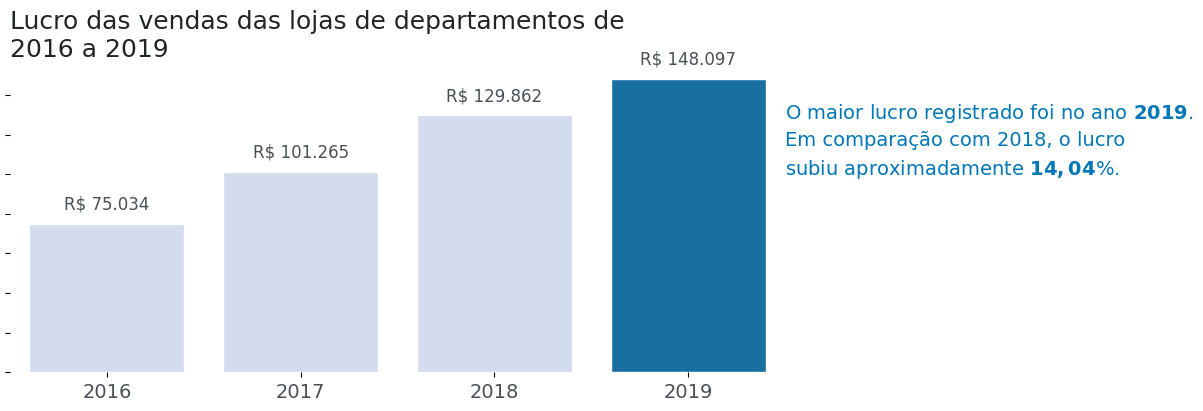

In [11]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.set_theme(style="white")

# Definindo as cores do gráfico
cores = []
for ano in df_lucro_ano.index:
  if df_lucro_ano.loc[ano,"lucro"] == df_lucro_ano["lucro"].max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

# Gerando o gráfico de colunas
ax = sns.barplot(data = df_lucro_ano, x = df_lucro_ano.index, y="lucro", palette = cores, hue=df_lucro_ano.index, legend=False)

# Personalizando o gráfico
ax.set_title("Lucro das vendas das lojas de departamentos de\n2016 a 2019", loc="left", fontsize = 18, color = CINZA1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.set_tick_params(labelsize = 14, labelcolor= CINZA2)
sns.despine(left= True, bottom = True)

# Escrevendo os valores de cada barra no gráfico
ax.set_yticklabels([])
for i, valor in enumerate(df_lucro_ano["lucro"]):
  qtd = f'R$ {valor:,.0f}'.replace(",",".")
  offset = 1e4
  ax.text(i, valor + offset, qtd, color = CINZA2, fontsize = 12, ha = "center", va = "center")

# Anotando uma conclusão no gráfico
ax.text(3.5, 1e5,
         'O maior lucro registrado foi no ano $\\bf{2019}$.\n'
         'Em comparação com 2018, o lucro\n'
         'subiu aproximadamente $\\bf{14,04}$%.',
         fontsize=14, linespacing=1.45, color=AZUL2)

# Exibindo o gráfico
plt.show()

# Desafio 2: Qual foi o faturamento (vendas) dos top 10 produtos durante o período de 2016 a 2019 do nosso conjunto de dados? Adicione um pequeno texto falando dos 3 produtos que mais venderam.

In [12]:
df_vendas_top10 = dados.copy()

In [13]:
df_vendas_top10 = df_vendas_top10[['tipo_produto', 'vendas']]

In [14]:
df_vendas_top10 = df_vendas_top10.groupby(['tipo_produto']).agg('sum').sort_values('vendas', ascending=False)
top_10 = df_vendas_top10[:10]
top_10

,vendas
tipo_produto,
pneus,1022428.97
ferramentas,995158.41
vasos,696044.18
ferramentas de jardinagem,648879.72
materiais de revestimento,629656.36
equipamentos de limpeza,542304.58
ferramentas automotivas,502109.29
peças de reposição,486907.94
encanamentos,373223.88


In [15]:
	# Adicionando texto com destaques

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

In [16]:
# Gerando o gráfico
from matplotlib import transforms

# Código para gerar o texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

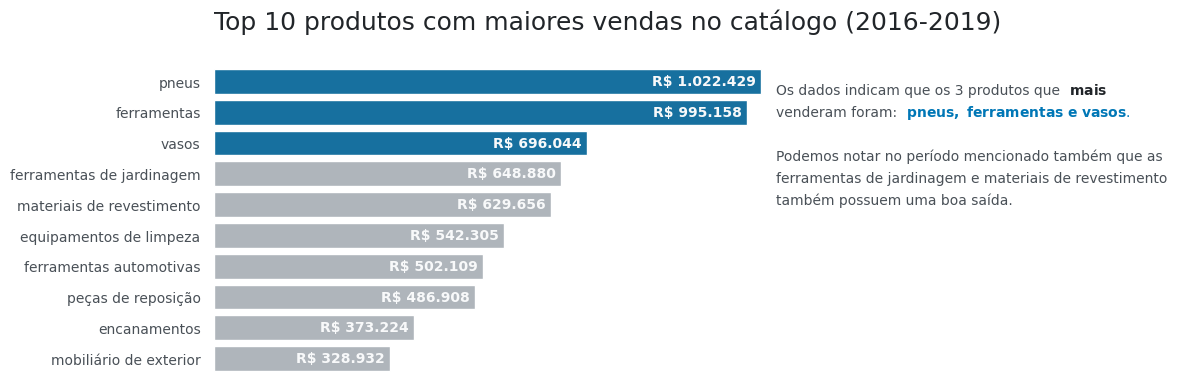

In [17]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=0.7)
sns.set_theme(style="white")

# Definindo as cores do gráfico: 3 primeiro em azul e restante em cinza
cores = [AZUL2 if i < 3 else CINZA3 for i in range(10)]

# Gerando o gráfico de barras
ax = sns.barplot(data = top_10, x="vendas", y = top_10.index, palette = cores, hue=top_10.index, legend=False)

# Personalizando o gráfico
ax.set_title('Top 10 produtos com maiores vendas no catálogo (2016-2019)\n', fontsize=18, color=CINZA1, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
sns.despine(left = True, bottom = True)

# Escrevendo os valores de cada barra no gráfico
for i, valor in enumerate(top_10['vendas']):
    qtd = f'R$ {valor:,.0f}'.replace(',','.')
    offset = 1e4  # offset de 10.000
    ax.text(valor - offset, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

# Gerando o texto colorido
texto_colorido(
    1.05e6, 4,                                                      # coordenadas
    'Os dados indicam que os 3 produtos que || $\\bf{mais}$\n'     # texto
    'venderam foram: || $\\bf{pneus,\ ferramentas\ e\ vasos}$.\n'
    '\n'
    'Podemos notar no período mencionado também que as\n'
    'ferramentas de jardinagem e materiais de revestimento\n'
    'também possuem uma boa saída.',
    [[CINZA2, CINZA1],                # linha 1                     # cores
     [CINZA2, AZUL2],                 # linha 2
     [CINZA2],                        # linha 3
     [CINZA2],                        # linha 4
     [CINZA2],                        # linha 6
     [CINZA2]
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=10)

# Exibindo o gráfico
plt.show()

#Desafio 1: Como estão divididas as vendas das lojas de departamentos na Região Centro-Oeste nos anos de 2017 e 2018? O mesmo estado permaneceu como o que mais vendeu nesta região?

In [18]:
vendas_co = dados.copy()
vendas_co = vendas_co[['data_pedido', 'regiao', 'estado', 'vendas']]

In [19]:
vendas_co['ano'] = vendas_co.data_pedido.dt.year
vendas_co

,data_pedido,regiao,estado,vendas,ano
0,2018-11-09,Sudeste,São Paulo,890.66,2018
1,2018-11-09,Sudeste,São Paulo,2488.59,2018
2,2018-06-13,Sudeste,Rio de Janeiro,49.72,2018
3,2017-10-12,Sul,Paraná,3255.75,2017
4,2017-10-12,Sul,Paraná,76.04,2017
...,...,...,...,...,...
8935,2018-09-30,Sudeste,Rio de Janeiro,123.22,2018
8936,2019-11-18,Nordeste,Bahia,271.97,2019
8937,2019-11-18,Nordeste,Bahia,700.75,2019
8938,2016-01-22,Nordeste,Paraíba,85.83,2016


In [20]:
vendas_co = vendas_co.query("regiao == 'Centro-Oeste' and (ano == 2017 or ano == 2018)")
vendas_co.drop(labels=['data_pedido', 'regiao'], axis=1, inplace=True)
vendas_co

<ipython-input-20-878584cf1ecf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_co.drop(labels=['data_pedido', 'regiao'], axis=1, inplace=True)


,estado,vendas,ano
26,Distrito Federal,10483.69,2017
27,Distrito Federal,32.70,2017
28,Distrito Federal,422.28,2017
29,Distrito Federal,11.10,2017
30,Distrito Federal,293.40,2017
...,...,...,...
8737,Distrito Federal,421.35,2018
8833,Mato Grosso,289.20,2017
8884,Distrito Federal,114.00,2018
8885,Distrito Federal,124.92,2018


In [21]:
vendas_co = pd.crosstab(index= vendas_co.ano, columns=vendas_co.estado, values=vendas_co.vendas, aggfunc='sum')
vendas_co

estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


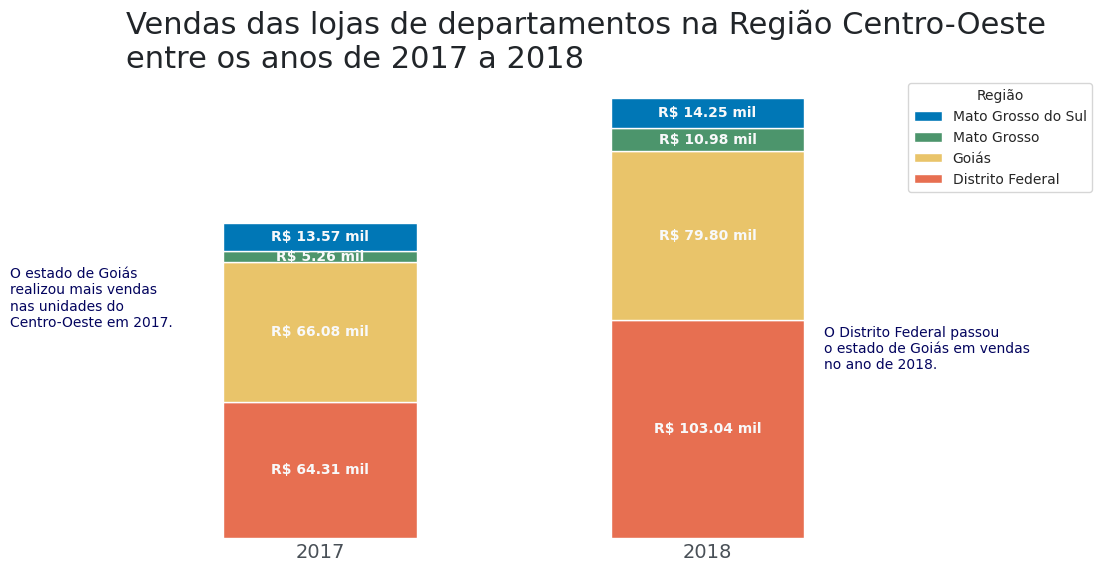

In [22]:
cores = [VERMELHO1, AMARELO1, VERDE1, AZUL2]

ax = vendas_co.plot(kind='bar', stacked=True, figsize=(10,6), color=cores)

ax.set_title('Vendas das lojas de departamentos na Região Centro-Oeste\nentre os anos de 2017 a 2018',
             loc='left', fontsize=22, color= CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
ax.set_frame_on(False)

ax.tick_params(axis='both', which='both', length=0)

ax.text(-0.8, 1e5, 'O estado de Goiás\nrealizou mais vendas\nnas unidades do\nCentro-Oeste em 2017.',
        fontsize=10, linespacing=1.2, color=AZUL1)
ax.text(1.3, 8e4, 'O Distrito Federal passou\no estado de Goiás em vendas\nno ano de 2018.',
        fontsize=10, linespacing=1.2, color=AZUL1)

ax.legend(bbox_to_anchor=(1,1), reverse=True, title='Região', title_fontsize=10, fontsize=10)

for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.2f} mil'.replace(",",".") for valor in container]
  ax.bar_label(container, label_type="center", labels = labels, size = 10, color = CINZA5, fontweight = "bold")

fig = ax.get_figure()

# Desafio 2: Analisando cada departamento, como estão divididos os modos de envio em cada um deles percentualmente?

In [23]:
df_depart = dados.copy()

In [24]:
df_depart = df_depart[['departamento', 'modo_envio']]
df_depart

,departamento,modo_envio
0,Materiais de construção,Econômica
1,Materiais de construção,Econômica
2,Jardinagem e paisagismo,Econômica
3,Materiais de construção,Entrega padrão
4,Jardinagem e paisagismo,Entrega padrão
...,...,...
8935,Automotivo,Entrega padrão
8936,Automotivo,Entrega padrão
8937,Automotivo,Entrega padrão
8938,Materiais de construção,Econômica


In [25]:
df_depart = pd.crosstab(index = df_depart.modo_envio, columns=df_depart.departamento, normalize='index')
df_depart

departamento,Automotivo,Jardinagem e paisagismo,Materiais de construção
modo_envio,,,
24 horas,0.171717,0.608081,0.220202
Econômica,0.185014,0.596542,0.218444
Entrega padrão,0.181683,0.612572,0.205745
Envio rápido,0.194218,0.595256,0.210526


In [26]:
def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

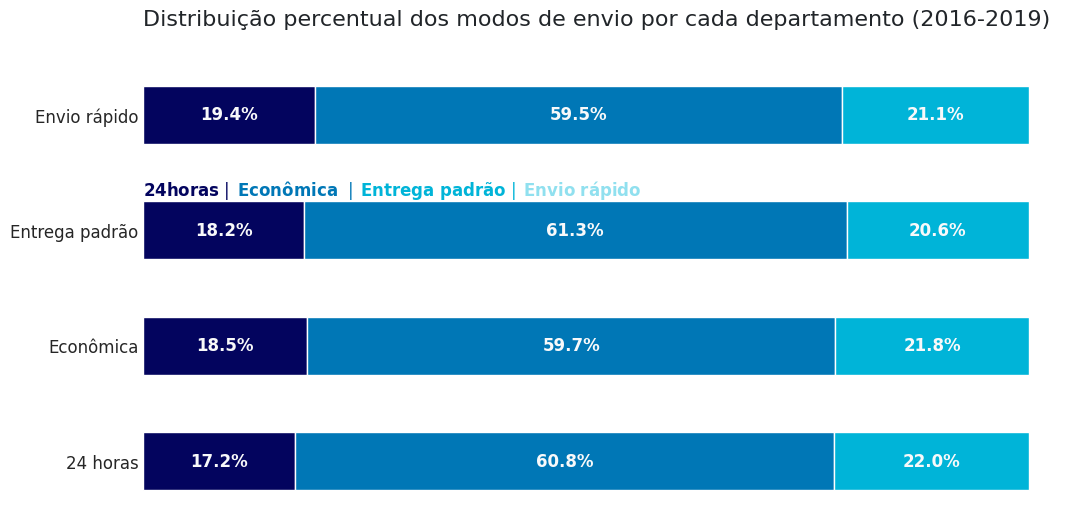

In [27]:
# Definindo as cores do gráfico
cores = [AZUL1, AZUL2, AZUL3, AZUL4]

# Gerando o gráfico de barras empilhadas
ax = df_depart.plot(kind="barh", stacked=True, figsize=(12,6), color = cores, legend = None)
ax.set_title("Distribuição percentual dos modos de envio por cada departamento (2016-2019)\n",
             fontsize=16, loc="left", color=CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# legenda dos dados
texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax=ax, fontsize=12)

# Valores das barras
for container in ax.containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    ax.bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig = ax.get_figure()

# Desafio 1: Como estão as vendas por semestre no estado em que você mora ou que deseja conhecer? Destaque os valores máximos e mínimos de venda para apresentá-los ao seu público.

In [28]:
import matplotlib.dates as mdates

In [29]:
dados['estado']

,estado
0,São Paulo
1,São Paulo
2,Rio de Janeiro
3,Paraná
4,Paraná
...,...
8935,Rio de Janeiro
8936,Bahia
8937,Bahia
8938,Paraíba


In [30]:
dados['data_pedido'] = pd.to_datetime(dados['data_pedido'], format='%Y-%m-%d')
df_vendas_parana = dados.copy()

# Criando um df com os dados desejados
df_vendas_parana = df_vendas_parana.query('estado == "Paraná"')[["data_pedido", "vendas"]]
df_vendas_parana

,data_pedido,vendas
3,2017-10-12,3255.75
4,2017-10-12,76.04
43,2018-06-21,153.00
44,2018-06-21,74.12
47,2018-06-18,709.08
...,...,...
8812,2016-11-07,148.50
8865,2019-01-30,44.06
8866,2019-01-30,322.50
8867,2019-01-30,45.83


In [31]:
# Agrupando as vendas por final do semestre (2Q)
df_vendas_parana.set_index("data_pedido", inplace = True)
df_vendas_parana = df_vendas_parana.resample("2QE", closed="left").agg("sum")
df_vendas_parana = df_vendas_parana.reset_index()
df_vendas_parana = df_vendas_parana.iloc[:8]
df_vendas_parana.head()

,data_pedido,vendas
0,2016-06-30,6291.37
1,2016-12-31,40435.35
2,2017-06-30,20672.88
3,2017-12-31,38600.25
4,2018-06-30,36687.74


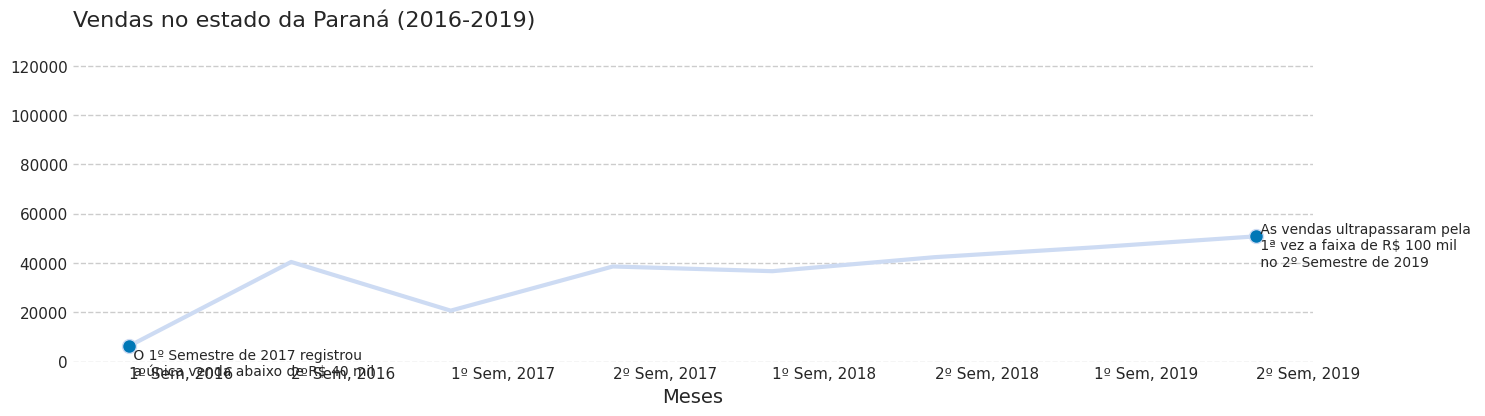

In [32]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(16,4))

# Resgatando o valor minimo, maximo das vendas
venda_min = df_vendas_parana.vendas.min()
venda_max = df_vendas_parana.vendas.max()
valores = df_vendas_parana.vendas.values

# Gerando a lista com os pontos a marcar (True apenas para mínimo e máximo)
pontos_a_marcar = list((valores == venda_min) | (valores == venda_max))

# Criando o gráfico de linha das vendas
ax.plot(df_vendas_parana["data_pedido"], df_vendas_parana["vendas"], lw = 3, color = AZUL5, marker = "o",
        markersize = 10, markerfacecolor = AZUL2, markevery =  pontos_a_marcar)

## Personalizando o gráfico
ax.set_title('Vendas no estado da Paraná (2016-2019)', fontsize = 16, loc='left', pad = 20)
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('')
ax.grid(axis = "y", linestyle="--")
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Descrevendo o limite mínimo e máximo do eixo y
plt.ylim(0, 1.25e5)

# Definindo o intervalo semestral para os dados
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = [6,12]))
labels = ["1º Sem, 2016", "2º Sem, 2016", "1º Sem, 2017", "2º Sem, 2017",
          "1º Sem, 2018", "2º Sem, 2018", "1º Sem, 2019", "2º Sem, 2019"]
ax.set_xticks(df_vendas_parana["data_pedido"])
ax.set_xticklabels(labels, ha = "left")

# Escrevendo texto nos pontos de destaque
for x, y in zip(df_vendas_parana.data_pedido, df_vendas_parana.vendas):
  if y == venda_min:
    ax.text(x, y = y - 1.2e4, s = f" O 1º Semestre de 2017 registrou \n a única venda abaixo de R$ 40 mil", fontsize = 10)
  if y == venda_max:
    ax.text(x, y = y - 1.2e4, s = f" As vendas ultrapassaram pela \n 1ª vez a faixa de R$ 100 mil \n no 2º Semestre de 2019", fontsize = 10)

plt.show()



#Desafio 2: Compare os lucros anuais dos estados da região Nordeste por meio de um gráfico de linhas.

In [33]:
import plotly.express as px

In [34]:
df_lucro_nordeste = dados.copy()
df_lucro_nordeste = df_lucro_nordeste.query("regiao == 'Nordeste'")[['estado', 'data_pedido', 'lucro']]

In [35]:
# Criando uma tabela cruzada (crosstab) com os valores de lucro por dia por estado
df_estados_ne = pd.crosstab(index=df_lucro_nordeste.data_pedido, columns=df_lucro_nordeste.estado, values=df_lucro_nordeste.lucro, aggfunc='sum')

# Agrupando os lucros por ano
df_estados_ne = df_estados_ne.resample('YE').agg('sum')
df_estados_ne = round(df_estados_ne/1e3, 2)
df_estados_ne

estado,Alagoas,Bahia,Ceará,Maranhão,Paraíba,Pernambuco,Piauí,Rio Grande do Norte,Sergipe
data_pedido,,,,,,,,,
2016-12-31,1.20,9.98,10.25,1.88,-0.27,11.73,0.02,0.27,0.89
2017-12-31,3.77,6.89,9.88,1.60,-2.20,4.24,1.43,0.65,0.98
2018-12-31,3.13,8.59,6.40,2.69,0.15,9.18,5.43,1.44,0.55
2019-12-31,1.45,14.09,30.26,5.07,1.60,6.98,1.34,2.09,1.95


In [36]:
# Gerando um gráfico de linha com os lurcos das lojas por ano dividido por estado da região nordeste
fig = px.line(df_estados_ne, x=df_estados_ne.index, y=df_estados_ne.columns, markers = True, labels={"estado": "Estados"},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, CINZA3, AZUL5, LARANJA1, CINZA1, AZUL4])

# Ajustando o layout do gráfico
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Lucros das lojas de departamentos por ano na Região Nordeste' +
                             '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= CINZA5)

# Ajustando os ticks do eixo y para o formato em milhar
fig.update_yaxes(tickprefix="R$ ", ticksuffix=" mil")

# Ajustando o eixo x com os labels dos anos
labels = ['2016', '2017', '2018', '2019']
fig.update_xaxes(ticktext = labels, tickvals=df_estados_ne.index)

# Dados ao passar o mouse (hover)
fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Lucro:</b> %{y}")

fig.show()

Desafio 1- Base de dados com as amostras das idades dos moradores do município de Cidade Alegre e crie os histogramas de colunas e de linha lado a lado, buscando interpretar as diferenças entre eles e o que podem representar separadamente. Adicione também uma linha que define a mediana da distribuição no histograma de linha e escreva o valor dessa medida no gráfico.

In [38]:
dados = pd.read_csv('/content/pop_idade.csv')
dados.head()

,idade
0,39
1,33
2,41
3,50
4,32


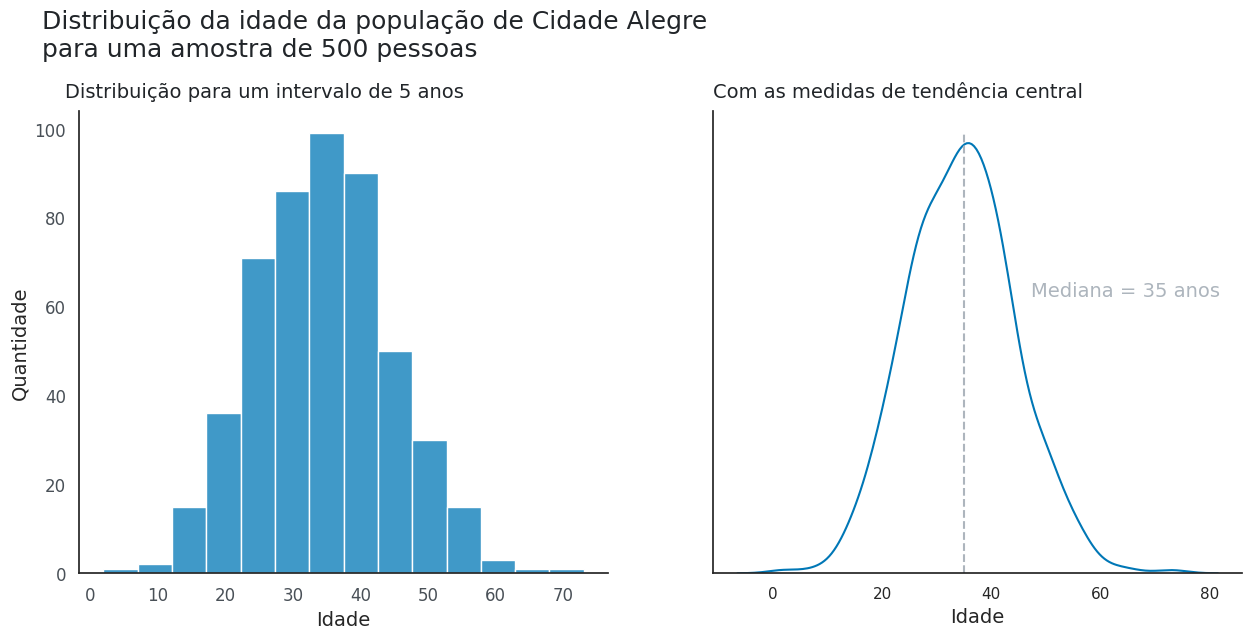

In [39]:
# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(15,6))
sns.set_theme(style="white")

# Título dos gráficos
fig.suptitle("Distribuição da idade da população de Cidade Alegre \npara uma amostra de 500 pessoas",
             fontsize=18, color=CINZA1, x = 0.1, y = 1.05, ha="left")

# GRÁFICO 1 - Histograma de Colunas

sns.histplot(ax = axs[0], data = dados, x = "idade", binwidth = 5, color = AZUL2)
axs[0].set_title('Distribuição para um intervalo de 5 anos', size=14, color=CINZA1, x = 0.35,  pad = 10)
axs[0].set_xlabel('Idade', fontsize = 14)
axs[0].set_ylabel('Quantidade', fontsize = 14)
axs[0].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[0].xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()

# GRÁFICO 2 - Histograma de Linhas

sns.kdeplot(ax = axs[1], data = dados, x = "idade", color = AZUL2)
axs[1].set_title('Com as medidas de tendência central', size=14, color=CINZA1, x = 0.35,  pad = 10)
axs[1].set_xlabel('Idade', fontsize = 14)
axs[1].set_ylabel('')
axs[1].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[1].set_yticklabels([])
sns.despine()

# gerando a linha que define a mediana e anotando seu valor
axs[1].vlines(x = dados.idade.median(), ymin = 0, ymax = 0.04, colors = CINZA3, linestyles = "--")
axs[1].text(0.6, 0.6, f'Mediana = {int(dados.idade.median())} anos', fontsize=14, color = CINZA3, transform=axs[1].transAxes)

plt.show()

#Nuvem de Palavras

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

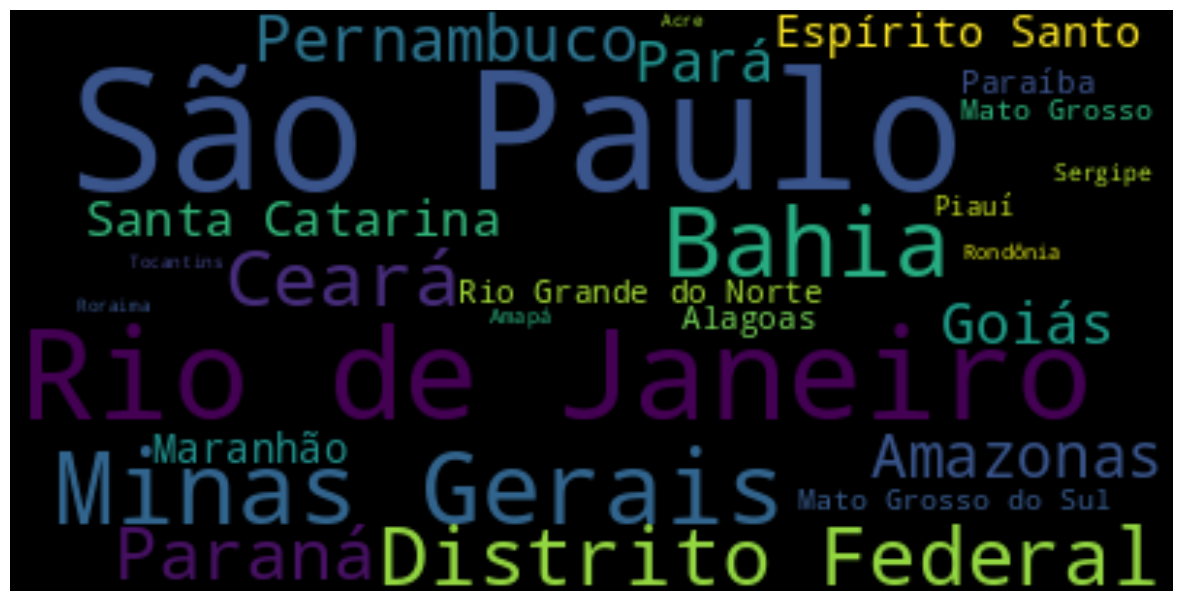

In [41]:
# Importando o relatório de vendas
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")

# Gerando um dicionário de frequências
dic = dict(vendas["estado"].value_counts())

# Criar um objeto wordcloud
wordcloud = WordCloud()

# Cria uma wordcloud através do dicionário de frequências
wordcloud.generate_from_frequencies(frequencies = dic)

fig, ax = plt.subplots(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
ax.axis("off")    # retirando bordas e ticks

plt.show()

In [45]:
# Importando o relatório de vendas
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")

# Gerando um dicionário de frequências
dic = dict(vendas["estado"].value_counts())

# Abrir a imagem com o mapa do Brasil e transformá-lo em um array do numpy
# o sinal til(~) inverte a máscara deixando o espaço dentro do mapa como local de desenho
image_mask = ~np.array(Image.open('mapa_br.png'))

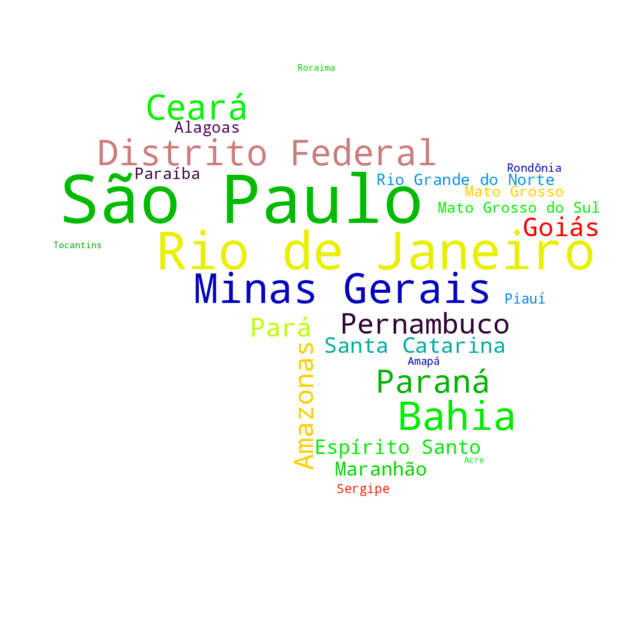

In [46]:
# Criar um objeto wordcloud
wordcloud = WordCloud(background_color = 'white',       # cor de fundo
                      width = image_mask.shape[1],      # largura
                      height = image_mask.shape[0],     # altura
                      mask = image_mask,                # imagem
                      contour_color = 'white',          # cor do contorno
                      colormap = 'nipy_spectral_r')     # cor das palavras

# Cria uma wordcloud através do dicionário de frequências
wordcloud.generate_from_frequencies(frequencies = dic)

fig, ax = plt.subplots(figsize = (10, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
ax.axis("off")    # retirando bordas e ticks
plt.show()

#DESAFIO:
gráficos de distribuição de dados para duas variáveis numéricas e/ou categóricas

Desafio 1: Baixe a base de dados com as notas das turmas de Data Visualization e crie o violinplot, buscando interpretar as diferenças entre cada uma delas e documentando os seus achados.

In [54]:
dados = pd.read_csv('/content/notas.csv')
dados.head()

,Turma,Nota
0,Turma 1,79
1,Turma 1,73
2,Turma 1,80
3,Turma 1,88
4,Turma 1,72


In [51]:
notas = dados.copy()
notas.describe()

,Nota
count,300.000000
mean,74.353333
std,7.723167
min,50.000000
25%,70.000000
50%,75.000000
75%,80.000000
max,93.000000


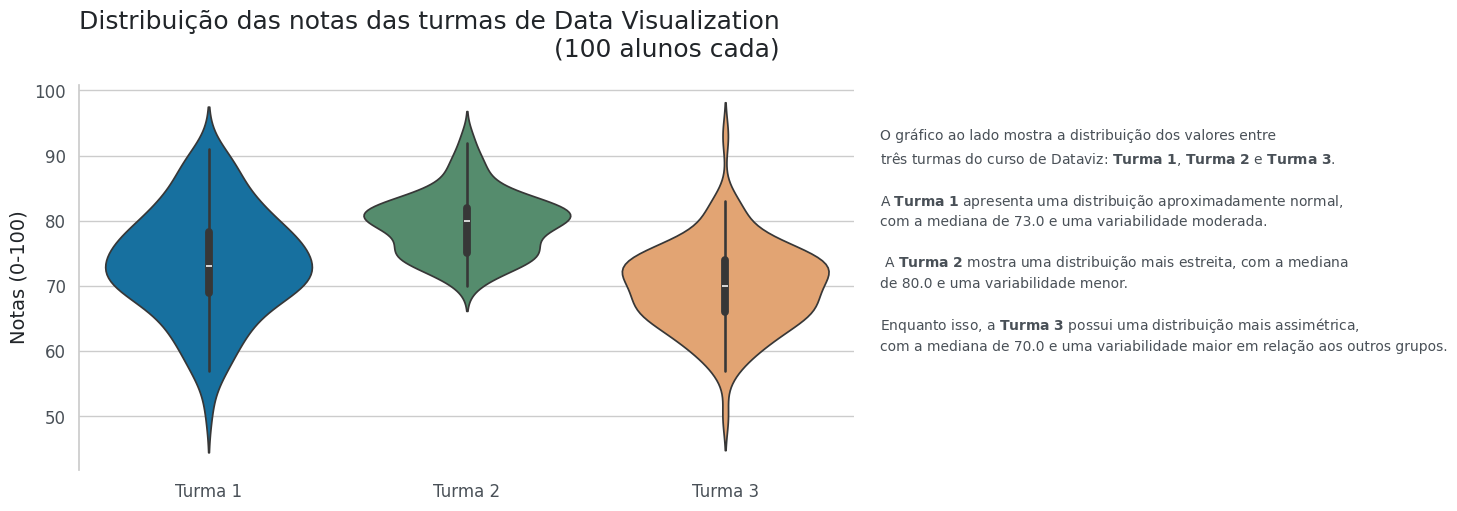

In [70]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style='whitegrid')

# Gerando o violinplot
ax = sns.violinplot(data=notas, x='Turma', y='Nota', hue='Turma', legend=False, palette= [AZUL2, VERDE1, LARANJA1])

## Personalizando o gráfico
plt.suptitle('Distribuição das notas das turmas de Data Visualization\n(100 alunos cada)', size=18, color=CINZA1, ha='right', x=0.825, y=1.03)
ax.set_xlabel('')
ax.set_ylabel('Notas (0-100)', fontsize=14, color=CINZA1)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# Criando uma lista com as medianas de cada turma
mediana = []
for i in range(1,4):
  mediana.append(notas.query(f"Turma == 'Turma {i}'").Nota.median())

# Texto explicativo
ax.text(2.6, 60,
         'O gráfico ao lado mostra a distribuição dos valores entre\n'
         'três turmas do curso de Dataviz: $\\bf{Turma\ 1}$, $\\bf{Turma\ 2}$ e $\\bf{Turma\ 3}$.\n\n'
         'A $\\bf{Turma\ 1}$ apresenta uma distribuição aproximadamente normal,\n'
         f'com a mediana de {mediana[0]} e uma variabilidade moderada.\n\n'
         ' A $\\bf{Turma\ 2}$ mostra uma distribuição mais estreita, com a mediana\n'
         f'de {mediana[1]} e uma variabilidade menor.\n\n'
         'Enquanto isso, a $\\bf{Turma\ 3}$ possui uma distribuição mais assimétrica,\n'
         f'com a mediana de {mediana[2]} e uma variabilidade maior em relação aos outros grupos.',
         fontsize=10, linespacing=1.45, color=CINZA2)

plt.show()